In [ ]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the data & General Data Exploration

In [ ]:
file_path = '/content/drive/My Drive/Summer Capstone/Initial Data Analysis/uhs_data.csv'
uhs = pd.read_csv(file_path)


In [ ]:
#uhs = pd.read_csv('uhs_data.csv')

In [ ]:
uhs.head(5)

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic
0,0,36.868834,0,0,White,Female,*Unspecified,*Unspecified,*Unspecified,English,"Not Hispanic, Latino/a, or Spanish origin",NaN,Married,F43.0,Acute stress reaction,4,43,Non-psychotic Mental,Severe Stress/Adjustment
1,1,470358.900500,0,0,White,Male,Male,Straight,Male,English,"Not Hispanic, Latino/a, or Spanish origin",ROSCOE,Single,F32.A,"Depression, unspecified",3,32,Mood Affective,Depressive Episode
2,2,263779.743500,0,0,White,Female,Female,Straight,Female,English,"Other Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F90.2,"Attention-deficit hyperactivity disorder, comb...",9,90,Childhood/Adolescence Onset,ADHD
3,3,263779.743500,0,0,White,Female,Female,Straight,Female,English,"Other Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F41.1,Generalized anxiety disorder,4,41,Non-psychotic Mental,Other Anxiety
4,4,128647.247000,0,0,White,Male,Male,*Unspecified,Male,English,"Not Hispanic, Latino/a, or Spanish origin",WALTON,Married,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety


In [ ]:
print(uhs.shape)
print(uhs.columns)
print(uhs.dtypes)
print(uhs.info())

# all say non-null, but have to look at the flags within the data

(88406, 19)
Index(['Unnamed: 0', 'Index', 'Chronic', 'IsCancerProblem', 'FirstRace',
       'EMRSex', 'SexAssignedAtBirth', 'SexualOrientation', 'GenderIdentity',
       'PreferredLanguage', 'Ethnicity', 'PatientCity', 'MaritalStatus',
       'ICD10', 'DxDisplayString', 'Super', 'Basic', 'Diagnosis_Super',
       'Diagnosis_Basic'],
      dtype='object')
Unnamed: 0              int64
Index                 float64
Chronic                 int64
IsCancerProblem         int64
FirstRace              object
EMRSex                 object
SexAssignedAtBirth     object
SexualOrientation      object
GenderIdentity         object
PreferredLanguage      object
Ethnicity              object
PatientCity            object
MaritalStatus          object
ICD10                  object
DxDisplayString        object
Super                   int64
Basic                   int64
Diagnosis_Super        object
Diagnosis_Basic        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88406 ent

In [ ]:
# Changing "Index" to text since it is not a number we want to do calcualtions with

uhs['Index'] = uhs['Index'].astype(str)

In [ ]:
uhs.describe(include= 'all')

# This helps because we can see how many values are unique in a column, as well
# as the value that is seen most often in that column (and how many times it is seen)

# Top Race - White
# Top EMRSex/SexAssignedAtBirst - Female
# PreferredLanguage - English
# Ethnicity - Not Hispanic, Latino/a, or Spanish origin
# PatientCity - Binghamton
# Marital Status - Single
# ICD10 - f41.9
# DxDisplayString - Anxiety disorder, unspecified (22675 cases)

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic
count,88406.000000,88406,88406.000000,88406.0,88117,88406,88406,88406,88406,88406,88406,88331,88406,88406,88406,88406.000000,88406.000000,88406,88406
unique,NaN,56408,NaN,NaN,22,4,7,8,10,33,8,2038,9,147,147,NaN,NaN,5,19
top,NaN,1545914.446,NaN,NaN,White,Female,Female,*Unspecified,*Unspecified,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F41.9,"Anxiety disorder, unspecified",NaN,NaN,Non-psychotic Mental,Other Anxiety
freq,NaN,13,NaN,NaN,78401,59175,56668,55422,36807,87884,82296,14053,40114,22675,22675,NaN,NaN,46154,37213
mean,44203.203617,NaN,0.031706,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.915979,40.707226,NaN,NaN
std,25521.119492,NaN,0.175217,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.440830,13.896108,NaN,NaN
min,0.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20.000000,NaN,NaN
25%,22101.250000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,32.000000,NaN,NaN
50%,44203.500000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,41.000000,NaN,NaN
75%,66304.750000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,41.000000,NaN,NaN


In [ ]:
uhs['DxDisplayString'].value_counts()

# 147 conditions

,count
DxDisplayString,
"Anxiety disorder, unspecified",22675
"Depression, unspecified",19574
Generalized anxiety disorder,8720
Other specified anxiety disorders,4142
"Attention-deficit hyperactivity disorder, unspecified type",3383
...,...
Agoraphobia without panic disorder,1
Dissociative amnesia,1
Shared psychotic disorder,1


In [ ]:
uhs['SexualOrientation'].value_counts()


,count
SexualOrientation,
*Unspecified,55422
Straight,24841
Don't know,2552
Choose not to disclose,2426
Bisexual,1357
Something else,1075
Lesbian,397
Gay,336


In [ ]:
uhs['GenderIdentity'].value_counts()


,count
GenderIdentity,
*Unspecified,36807
Female,34122
Male,16571
Other,272
Transgender Male,210
Nonbin,140
Transgender Female,114
Choose not to disclose,82
Nonbinary,71


In [ ]:
uhs['PreferredLanguage'].value_counts()

,count
PreferredLanguage,
English,87884
Spanish,171
Sign Language,42
*Unspecified,36
Bengali,29
Unknown,27
Urdu,25
Arabic,22
Chinese,19


In [ ]:
uhs['Ethnicity'].value_counts()

,count
Ethnicity,
"Not Hispanic, Latino/a, or Spanish origin",82296
Unknown,2780
"Other Hispanic, Latino/a, or Spanish origin",1875
Puerto Rican,674
*Unspecified,283
Decline to Answer,283
"Mexican, Mexican American, or Chicano/a",154
Cuban,61


## DEALING WITH LOCATION ISSUES

In [ ]:
uhs['PatientCity'].value_counts()

,count
PatientCity,
BINGHAMTON,14053
Binghamton,6172
ENDICOTT,5986
JOHNSON CITY,3502
Endicott,3163
...,...
Frisco,1
North Rose,1
vestal,1


In [ ]:
# Dealing with issues like BINGHAMTON and Binghamton, etc.

print(list(uhs['PatientCity'].unique()))

[nan, 'ROSCOE', 'BINGHAMTON', 'WALTON', 'DOWNSVILLE', 'HAMDEN', 'AFTON', 'EAST BRANCH', 'East Branch', 'UNADILLA', 'JOHNSON CITY', 'ROXBURY', 'ANDES', 'DELHI', 'NORTH BRANCH', 'ROSEBOOM', 'BLOOMVILLE', 'FRANKLIN', 'LIVINGSTON MANOR', 'Walton', 'Livingston Manor', 'SIDNEY', 'SIDNEY CENTER', 'ENDICOTT', 'Otego', 'CONKLIN', 'Roscoe', 'ARKVILLE', 'SOUTH KORTRIGHT', 'Sidney Center', 'PALM COAST', 'TREADWELL', 'DEPOSIT', 'Bainbridge', 'Endicott', 'Delancey', 'DELANCEY', 'BROOKLYN', 'Downsville', 'BOVINA CENTER', 'HOBART', 'Glen Spey', 'NORWICH', 'CAVE CREEK', 'MASTIC BEACH', 'Hamden', 'MOUNT VISION', 'MOUNT UPTON', 'WEST WINFIELD', 'MIAMI BEACH', 'Sidney', 'Binghamton', 'Hancock', 'HILTON', 'VESTAL', 'OTEGO', 'EAST MEREDITH', 'BOHEMIA', 'Deposit', 'YONKERS', 'ONEONTA', 'Delhi', 'WINDSOR', 'HANCOCK', 'ELMSFORD', 'Oxford', 'OWEGO', 'SHERBURNE', 'OXFORD', 'Treadwell', 'LAMBERTVILLE', 'MORRIS', 'Schenevus', 'FISHS EDDY', 'BAINBRIDGE', 'hamden', 'Unadilla', 'Johnson City', 'CLIFTON PARK', 'ENDWEL

In [ ]:
uhs['PatientCity'] = uhs['PatientCity'].str.strip()
uhs['PatientCity_clean'] = uhs['PatientCity'].str.lower()

In [ ]:
uhs['PatientCity_clean'].value_counts()

,count
PatientCity_clean,
binghamton,20359
endicott,9210
johnson city,5153
norwich,4563
vestal,3975
...,...
hegins,1
roslyn heights,1
ballston lake,1


In [ ]:
uhs[uhs['PatientCity_clean'] == "sidney center"]

#can use this code later on to see if sidney and sidney center have the same zip codes

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
74,74,452671.0232,0,0,White,Male,Male,*Unspecified,Male,English,"Not Hispanic, Latino/a, or Spanish origin",SIDNEY CENTER,Unknown,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety,sidney center
88,88,221904.0873,0,0,White,Male,Male,*Unspecified,*Unspecified,English,"Not Hispanic, Latino/a, or Spanish origin",SIDNEY CENTER,Divorced,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety,sidney center
108,108,70173.82435,0,0,White,Male,Male,Straight,Male,English,"Not Hispanic, Latino/a, or Spanish origin",Sidney Center,Married,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety,sidney center
109,109,70173.82435,0,0,White,Male,Male,Straight,Male,English,"Not Hispanic, Latino/a, or Spanish origin",Sidney Center,Married,F32.A,"Depression, unspecified",3,32,Mood Affective,Depressive Episode,sidney center
131,131,58588.32705,0,0,White,Male,Male,Straight,Male,English,"Not Hispanic, Latino/a, or Spanish origin",SIDNEY CENTER,Married,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety,sidney center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87954,87955,113094.8074,0,0,Other,Female,Female,Straight,Female,English,"Not Hispanic, Latino/a, or Spanish origin",SIDNEY CENTER,Married,F43.21,Adjustment disorder with depressed mood,4,43,Non-psychotic Mental,Severe Stress/Adjustment,sidney center
88338,88339,981075.1816,0,0,White,Male,Male,Straight,Male,English,"Not Hispanic, Latino/a, or Spanish origin",SIDNEY CENTER,Married,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety,sidney center
88360,88361,589874.198,0,0,White,Male,Male,*Unspecified,Male,English,"Not Hispanic, Latino/a, or Spanish origin",Sidney Center,Single,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety,sidney center
88361,88362,589874.198,0,0,White,Male,Male,*Unspecified,Male,English,"Not Hispanic, Latino/a, or Spanish origin",Sidney Center,Single,F32.A,"Depression, unspecified",3,32,Mood Affective,Depressive Episode,sidney center


In [ ]:
print(list(uhs['PatientCity_clean'].unique()))

[nan, 'roscoe', 'binghamton', 'walton', 'downsville', 'hamden', 'afton', 'east branch', 'unadilla', 'johnson city', 'roxbury', 'andes', 'delhi', 'north branch', 'roseboom', 'bloomville', 'franklin', 'livingston manor', 'sidney', 'sidney center', 'endicott', 'otego', 'conklin', 'arkville', 'south kortright', 'palm coast', 'treadwell', 'deposit', 'bainbridge', 'delancey', 'brooklyn', 'bovina center', 'hobart', 'glen spey', 'norwich', 'cave creek', 'mastic beach', 'mount vision', 'mount upton', 'west winfield', 'miami beach', 'hancock', 'hilton', 'vestal', 'east meredith', 'bohemia', 'yonkers', 'oneonta', 'windsor', 'elmsford', 'oxford', 'owego', 'sherburne', 'lambertville', 'morris', 'schenevus', 'fishs eddy', 'clifton park', 'endwell', 'harpursville', 'chenango forks', 'mount vernon', 'mahopac', 'masonville', 'silver spring', 'harpersfield', 'conyers', 'callicoon', 'brentwood', 'new berlin', 'middletown', 'stamford', 'tumwater', 'stanfordville', 'edmeston', 'richford', 'jeffersonville',

## Looking at MaritalStatus

In [ ]:
# Curious to see if any repeated patients have had their maritial status change

In [ ]:
# changing Index to text


In [ ]:
uhs['Index'].value_counts()

,count
Index,
1545914.446,13
73495.34422,12
195607.8875,12
16758.61151,10
24226.29422,10
...,...
15721.541,1
20623.33631,1
302305.0152,1


In [ ]:
status_counts = uhs.groupby('Index')['MaritalStatus'] \
                  .nunique()

changed_ids = status_counts[status_counts > 1].index

uhs_marital_changed = uhs[uhs['Index'].isin(changed_ids)]

uhs_marital_changed = uhs_marital_changed.sort_values(['Index', 'DxDisplayString'])

In [ ]:
print("People whose marital status changed:")
print(changed_ids.tolist())
print("\nFull records for those people:")
print(uhs_marital_changed)


#No, no one's maritalstatus changed

People whose marital status changed:
[]

Full records for those people:
Empty DataFrame
Columns: [Unnamed: 0, Index, Chronic, IsCancerProblem, FirstRace, EMRSex, SexAssignedAtBirth, SexualOrientation, GenderIdentity, PreferredLanguage, Ethnicity, PatientCity, MaritalStatus, ICD10, DxDisplayString, Super, Basic, Diagnosis_Super, Diagnosis_Basic, PatientCity_clean]
Index: []


In [ ]:
# Just checking that marital status did not change

uhs[uhs['Index'] == '73495.34422']



,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
29942,29943,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F31.10,"Bipolar disorder, current episode manic withou...",3,31,Mood Affective,Bipolar,binghamton
29943,29944,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F32.A,"Depression, unspecified",3,32,Mood Affective,Depressive Episode,binghamton
29944,29945,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F41.0,Panic disorder (episodic paroxysmal anxiety),4,41,Non-psychotic Mental,Other Anxiety,binghamton
29945,29946,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F42.9,"Obsessive-compulsive disorder, unspecified",4,42,Non-psychotic Mental,OCD,binghamton
29946,29947,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F90.9,"Attention-deficit hyperactivity disorder, unsp...",9,90,Childhood/Adolescence Onset,ADHD,binghamton
29947,29948,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F32.A,"Depression, unspecified",3,32,Mood Affective,Depressive Episode,binghamton
29948,29949,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F90.2,"Attention-deficit hyperactivity disorder, comb...",9,90,Childhood/Adolescence Onset,ADHD,binghamton
29949,29950,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F41.9,"Anxiety disorder, unspecified",4,41,Non-psychotic Mental,Other Anxiety,binghamton
29950,29951,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F34.1,Dysthymic disorder,3,34,Mood Affective,Persistent Mood Affective,binghamton
29951,29952,73495.34422,0,0,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F90.0,"Attention-deficit hyperactivity disorder, pred...",9,90,Childhood/Adolescence Onset,ADHD,binghamton


In [ ]:
uhs.columns

Index(['Unnamed: 0', 'Index', 'Chronic', 'IsCancerProblem', 'FirstRace',
       'EMRSex', 'SexAssignedAtBirth', 'SexualOrientation', 'GenderIdentity',
       'PreferredLanguage', 'Ethnicity', 'PatientCity', 'MaritalStatus',
       'ICD10', 'DxDisplayString', 'Super', 'Basic', 'Diagnosis_Super',
       'Diagnosis_Basic', 'PatientCity_clean'],
      dtype='object')

## Looking at specific conditions

In [ ]:
adhd = uhs[uhs['DxDisplayString'] == 'Attention-deficit hyperactivity disorder, unspecified type']
adhd.describe(include= 'all')

#Top value is Male, others I explored have been female

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
count,3383.000000,3383,3383.000000,3383.0,3358,3383,3383,3383,3383,3383,3383,3381,3383,3383,3383,3383.0,3383.0,3383,3383,3381
unique,NaN,3364,NaN,NaN,17,3,6,8,10,3,8,369,9,1,1,NaN,NaN,1,1,267
top,NaN,156547.2629,NaN,NaN,White,Male,Male,*Unspecified,*Unspecified,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F90.9,"Attention-deficit hyperactivity disorder, unsp...",NaN,NaN,Childhood/Adolescence Onset,ADHD,binghamton
freq,NaN,2,NaN,NaN,2982,1814,1681,2328,1673,3381,3120,527,2373,3383,3383,NaN,NaN,3383,3383,780
mean,49148.652380,NaN,0.017145,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,90.0,NaN,NaN,NaN
std,23971.761796,NaN,0.129829,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,11.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,90.0,NaN,NaN,NaN
25%,33331.500000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,90.0,NaN,NaN,NaN
50%,53711.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,90.0,NaN,NaN,NaN
75%,66411.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,90.0,NaN,NaN,NaN


In [ ]:
ocd = uhs[uhs['DxDisplayString'] == 'Obsessive-compulsive disorder, unspecified']

In [ ]:
ocd.describe(include= 'all')

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
count,680.000000,680,680.000000,680.0,677,680,680,680,680,680,680,679,680,680,680,680.0,680.0,680,680,679
unique,NaN,675,NaN,NaN,10,2,4,8,7,1,8,162,8,1,1,NaN,NaN,1,1,125
top,NaN,287576.0791,NaN,NaN,White,Female,Female,*Unspecified,*Unspecified,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F42.9,"Obsessive-compulsive disorder, unspecified",NaN,NaN,Non-psychotic Mental,OCD,binghamton
freq,NaN,2,NaN,NaN,641,401,386,471,309,680,641,95,420,680,680,NaN,NaN,680,680,143
mean,44554.820588,NaN,0.036765,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,42.0,NaN,NaN,NaN
std,25029.595302,NaN,0.188322,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,161.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,42.0,NaN,NaN,NaN
25%,22481.750000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,42.0,NaN,NaN,NaN
50%,45223.500000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,42.0,NaN,NaN,NaN
75%,64873.500000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,42.0,NaN,NaN,NaN


In [ ]:
depression = uhs[uhs['DxDisplayString'] == 'Depression, unspecified']
depression.describe(include= 'all')

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
count,19574.000000,19574,19574.000000,19574.0,19478,19574,19574,19574,19574,19574,19574,19555,19574,19574,19574,19574.0,19574.0,19574,19574,19555
unique,NaN,19388,NaN,NaN,19,4,7,8,10,25,8,1014,9,1,1,NaN,NaN,1,1,745
top,NaN,188685.3517,NaN,NaN,White,Female,Female,*Unspecified,*Unspecified,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F32.A,"Depression, unspecified",NaN,NaN,Mood Affective,Depressive Episode,binghamton
freq,NaN,3,NaN,NaN,17581,14073,13372,12638,8635,19448,18308,2694,7507,19574,19574,NaN,NaN,19574,19574,4080
mean,43080.892970,NaN,0.018800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,32.0,NaN,NaN,NaN
std,24905.505493,NaN,0.135823,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,1.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,32.0,NaN,NaN,NaN
25%,21860.250000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,32.0,NaN,NaN,NaN
50%,41223.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,32.0,NaN,NaN,NaN
75%,64796.750000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,32.0,NaN,NaN,NaN


In [ ]:
anxiety = uhs[uhs['DxDisplayString'] == 'Anxiety disorder, unspecified']
anxiety.describe(include= 'all')

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
count,22675.000000,22675,22675.000000,22675.0,22648,22675,22675,22675,22675,22675,22675,22658,22675,22675,22675,22675.0,22675.0,22675,22675,22658
unique,NaN,22420,NaN,NaN,22,4,6,8,10,28,8,1086,9,1,1,NaN,NaN,1,1,796
top,NaN,479929.6655,NaN,NaN,White,Female,Female,*Unspecified,*Unspecified,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F41.9,"Anxiety disorder, unspecified",NaN,NaN,Non-psychotic Mental,Other Anxiety,binghamton
freq,NaN,3,NaN,NaN,20354,15939,15343,14579,9882,22544,21092,3050,9660,22675,22675,NaN,NaN,22675,22675,4617
mean,45544.292481,NaN,0.027034,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,41.0,NaN,NaN,NaN
std,25992.430392,NaN,0.162187,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,4.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,41.0,NaN,NaN,NaN
25%,23105.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,41.0,NaN,NaN,NaN
50%,46607.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,41.0,NaN,NaN,NaN
75%,68231.500000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,41.0,NaN,NaN,NaN


In [ ]:
ptsd = uhs[uhs['DxDisplayString'] == 'Post-traumatic stress disorder, unspecified']
ptsd.describe(include= 'all')

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
count,3315.000000,3315,3315.000000,3315.0,3305,3315,3315,3315,3315,3315,3315,3314,3315,3315,3315,3315.0,3315.0,3315,3315,3314
unique,NaN,3293,NaN,NaN,17,2,5,8,10,11,8,369,9,1,1,NaN,NaN,1,1,276
top,NaN,369137.4357,NaN,NaN,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F43.10,"Post-traumatic stress disorder, unspecified",NaN,NaN,Non-psychotic Mental,Severe Stress/Adjustment,binghamton
freq,NaN,2,NaN,NaN,2787,2217,2129,1794,1449,3287,3025,681,1653,3315,3315,NaN,NaN,3315,3315,920
mean,44049.891403,NaN,0.074811,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,43.0,NaN,NaN,NaN
std,26540.524469,NaN,0.263127,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,17.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,43.0,NaN,NaN,NaN
25%,20348.500000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,43.0,NaN,NaN,NaN
50%,45336.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,43.0,NaN,NaN,NaN
75%,67579.500000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,43.0,NaN,NaN,NaN


In [ ]:
bpd = uhs[uhs['DxDisplayString'] == 'Borderline personality disorder']
bpd.describe(include= 'all')

,Unnamed: 0,Index,Chronic,IsCancerProblem,FirstRace,EMRSex,SexAssignedAtBirth,SexualOrientation,GenderIdentity,PreferredLanguage,Ethnicity,PatientCity,MaritalStatus,ICD10,DxDisplayString,Super,Basic,Diagnosis_Super,Diagnosis_Basic,PatientCity_clean
count,1104.000000,1104,1104.000000,1104.0,1101,1104,1104,1104,1104,1104,1104,1104,1104,1104,1104,1104.0,1104.0,1104,1104,1104
unique,NaN,1097,NaN,NaN,14,3,5,8,9,6,7,204,9,1,1,NaN,NaN,1,1,159
top,NaN,91912.63579,NaN,NaN,White,Female,Female,*Unspecified,Female,English,"Not Hispanic, Latino/a, or Spanish origin",BINGHAMTON,Single,F60.3,Borderline personality disorder,NaN,NaN,Adult Personality,Specific Personality,binghamton
freq,NaN,2,NaN,NaN,939,849,832,497,583,1097,1013,273,742,1104,1104,NaN,NaN,1104,1104,337
mean,44678.480072,NaN,0.173007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,60.0,NaN,NaN,NaN
std,26273.557665,NaN,0.378425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,194.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,60.0,NaN,NaN,NaN
25%,21187.750000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,60.0,NaN,NaN,NaN
50%,48117.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,60.0,NaN,NaN,NaN
75%,65366.250000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,60.0,NaN,NaN,NaN


## Outlier Analysis

In [ ]:
num_cols = uhs.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
uhs['Chronic'].value_counts()

,count
Chronic,
0,85603
1,2803


In [ ]:
uhs['IsCancerProblem'].value_counts()

# Only on data point is a cancer problem

,count
IsCancerProblem,
0,88406


## Bar plots and other visualizations

In [ ]:
uhs['EMRSex'].value_counts()

,count
EMRSex,
Female,59175
Male,29200
X,28
Unknown,3


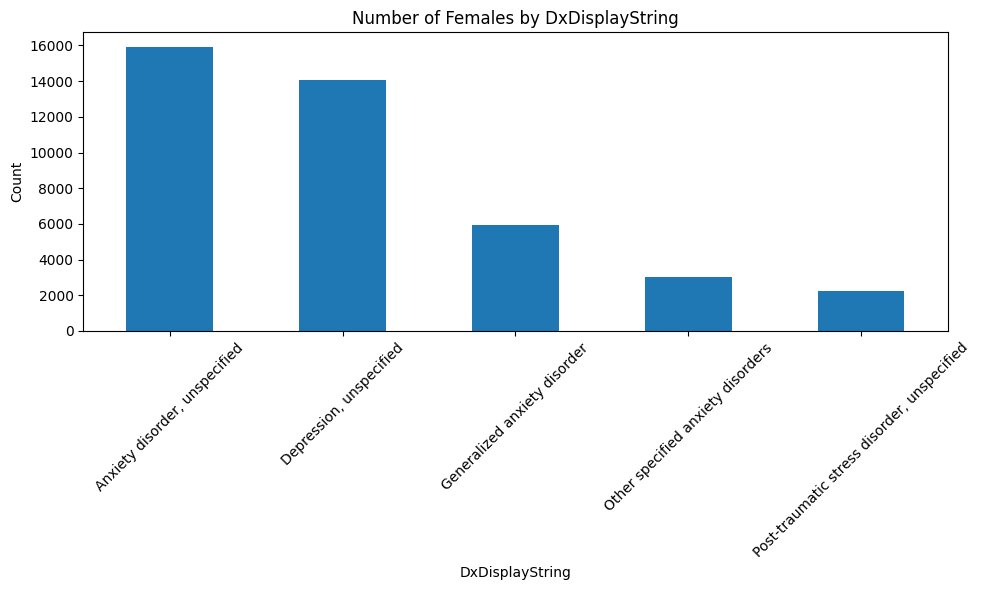

In [ ]:
female_df = uhs[uhs['EMRSex'] == 'Female']

counts = (
    female_df['DxDisplayString']
    .value_counts()
    .head(5)
)

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Number of Females by DxDisplayString')
plt.xlabel('DxDisplayString')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


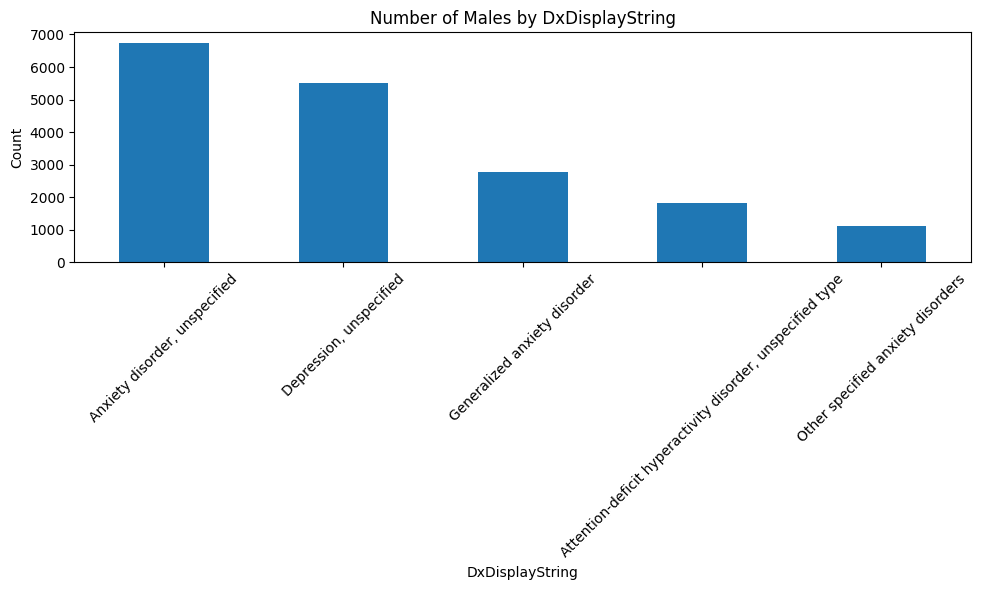

In [ ]:
male_df = uhs[uhs['EMRSex'] == 'Male']

counts = (
    male_df['DxDisplayString']
    .value_counts()
    .head(5)
)

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Number of Males by DxDisplayString')
plt.xlabel('DxDisplayString')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


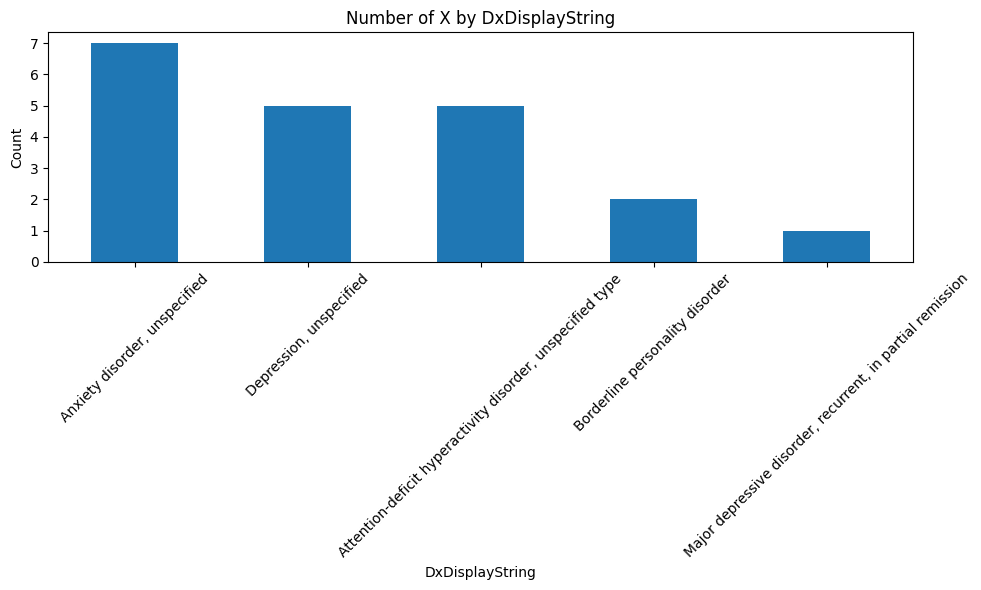

In [ ]:
x_df = uhs[uhs['EMRSex'] == 'X']

counts = (
    x_df['DxDisplayString']
    .value_counts()
    .head(5)
)

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Number of X by DxDisplayString')
plt.xlabel('DxDisplayString')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
uhs['MaritalStatus'].value_counts()

,count
MaritalStatus,
Single,40114
Married,28724
Divorced,7735
Widowed,4780
Significant Other,3144
Legally Separated,2136
Unknown,1414
*Unspecified,286
Other,73


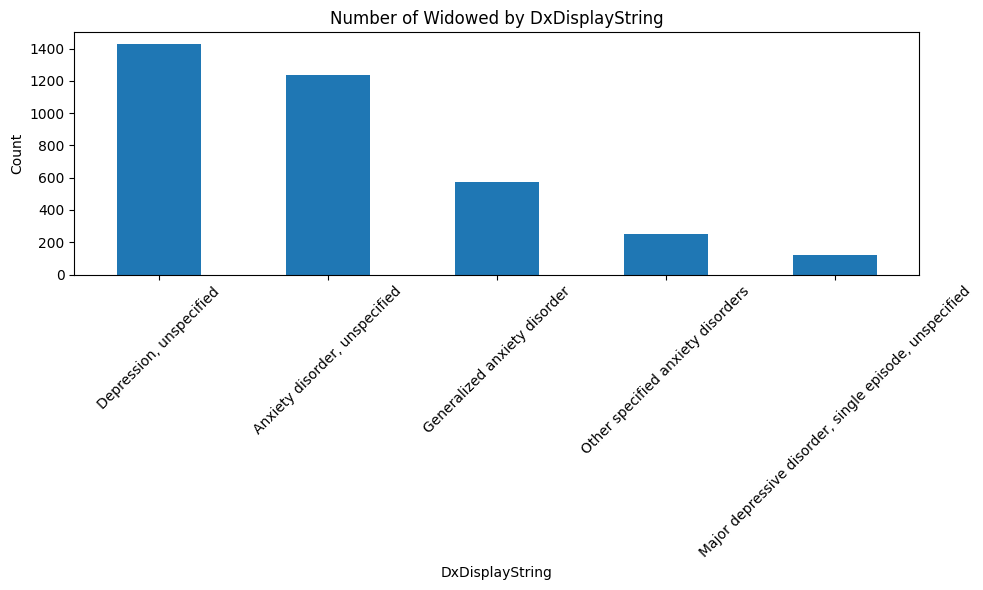

In [ ]:
widow_df = uhs[uhs['MaritalStatus'] == 'Widowed']

counts = (
    widow_df['DxDisplayString']
    .value_counts()
    .head(5)
)

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Number of Widowed by DxDisplayString')
plt.xlabel('DxDisplayString')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

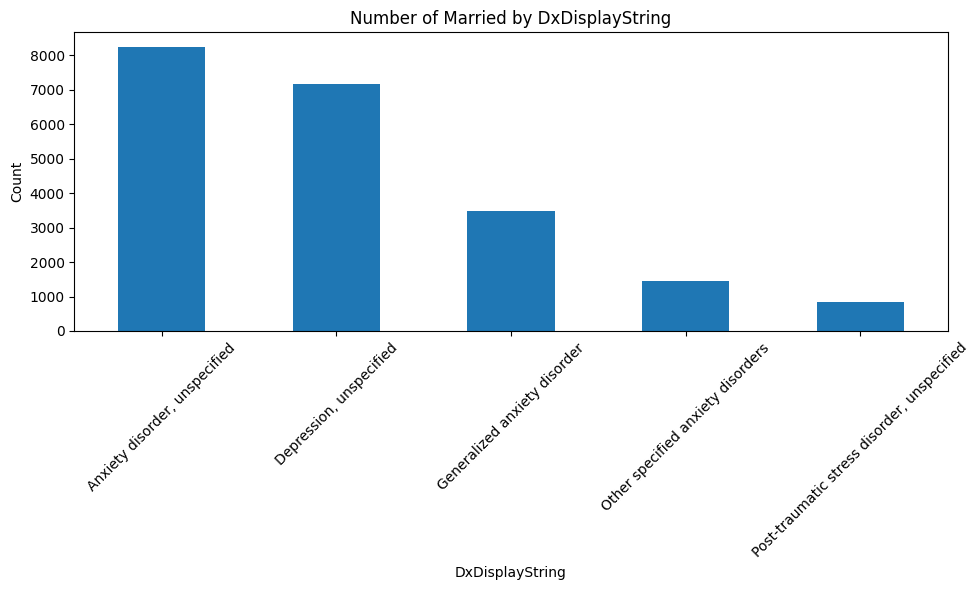

In [ ]:
married_df = uhs[uhs['MaritalStatus'] == 'Married']

counts = (
    married_df['DxDisplayString']
    .value_counts()
    .head(5)
)

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Number of Married by DxDisplayString')
plt.xlabel('DxDisplayString')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

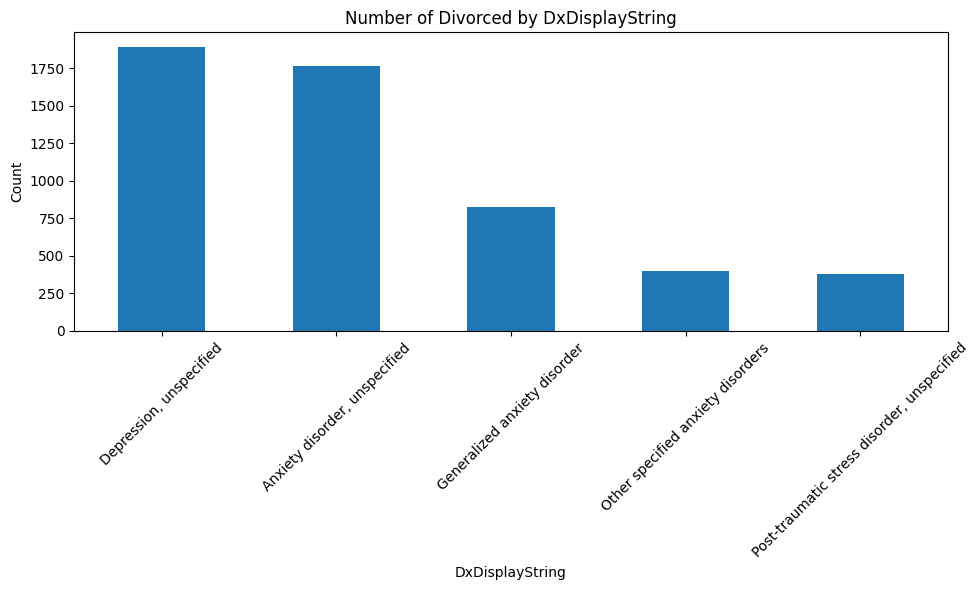

In [ ]:
divorce_df = uhs[uhs['MaritalStatus'] == 'Divorced']

counts = (
    divorce_df['DxDisplayString']
    .value_counts()
    .head(5)
)

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Number of Divorced by DxDisplayString')
plt.xlabel('DxDisplayString')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlations

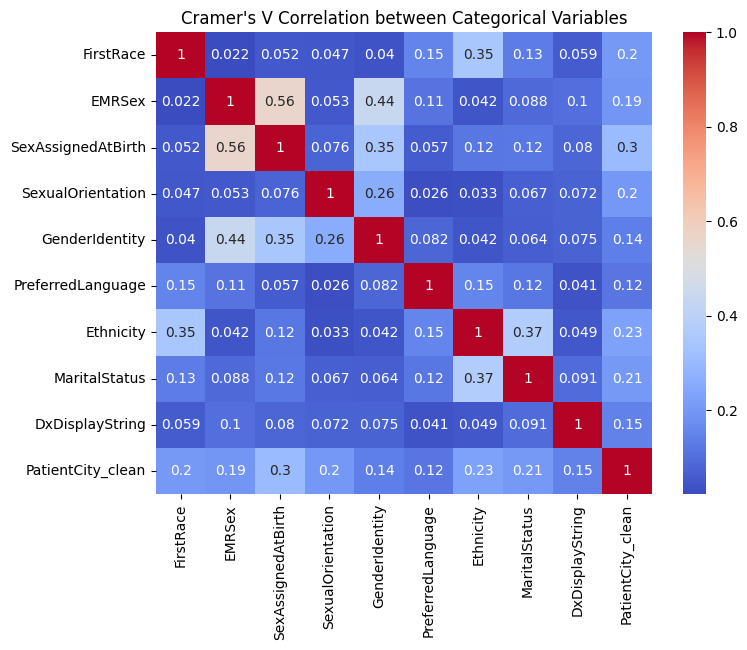

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to compute Cramer’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# List of your categorical columns
categorical_cols = ['FirstRace', 'EMRSex', 'SexAssignedAtBirth', 'SexualOrientation', 'GenderIdentity',
       'PreferredLanguage', 'Ethnicity', 'MaritalStatus',
       'DxDisplayString', 'PatientCity_clean']

# Create correlation matrix
cramer_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramer_matrix.loc[col1, col2] = cramers_v(uhs[col1], uhs[col2])

# Convert to float
cramer_matrix = cramer_matrix.astype(float)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm")
plt.title("Cramer's V Correlation between Categorical Variables")
plt.show()


## More In-Depth Analysis on Marital Status


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table (e.g., top 10 diagnoses)
top_dx = uhs['DxDisplayString'].value_counts().head(5).index
subset = uhs[uhs['DxDisplayString'].isin(top_dx)]
contingency = pd.crosstab(subset['MaritalStatus'], subset['DxDisplayString'])

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-squared test p-value: {p}")


Chi-squared test p-value: 0.0


In [ ]:
print(f"Chi-squared statistic: {chi2}")


Chi-squared statistic: 1655.9618465670967


In [ ]:
contingency

DxDisplayString,"Anxiety disorder, unspecified","Attention-deficit hyperactivity disorder, unspecified type","Depression, unspecified",Generalized anxiety disorder,Other specified anxiety disorders
MaritalStatus,,,,,
*Unspecified,28,25,92,62,3
Divorced,1763,146,1895,824,402
Legally Separated,462,55,498,198,82
Married,8253,589,7173,3491,1462
Other,20,1,12,8,4
Significant Other,865,123,646,219,170
Single,9660,2373,7507,3213,1718
Unknown,389,49,321,129,47
Widowed,1235,22,1430,576,254


In [ ]:
import numpy as np

n = contingency.to_numpy().sum()
phi2 = chi2 / n
r, k = contingency.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))
print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.08412779519312702


------------------


In [ ]:
uhs['MaritalStatus_filtered'] = uhs['MaritalStatus'].where(
    uhs['MaritalStatus'].isin(['Single', 'Married', 'Divorced', 'Widowed']), 'Other'
)


In [ ]:
# Example for Married group
married_total = uhs[uhs['MaritalStatus'] == 'Married'].shape[0]
married_top_dx = (
    married_df['DxDisplayString'].value_counts(normalize=True) * 1000
).head(5)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create matrix
pivot = pd.crosstab(uhs['MaritalStatus'], uhs['DxDisplayString'])
pivot = pivot.loc[:, pivot.sum() > 200]  # remove rare diagnoses
pivot_scaled = StandardScaler().fit_transform(pivot)

# Cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(pivot_scaled)
pivot['Cluster'] = kmeans.labels_


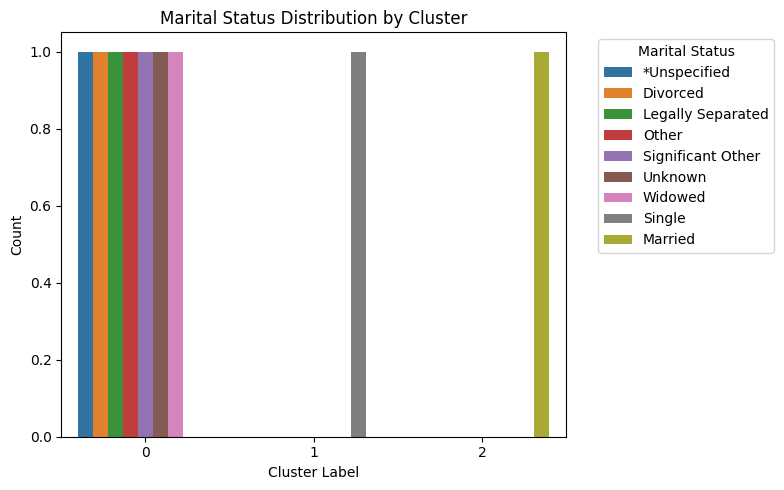

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index so MaritalStatus is a column
cluster_df = pivot.reset_index()[['MaritalStatus', 'Cluster']]

# Count of marital status per cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=cluster_df, x='Cluster', hue='MaritalStatus')
plt.title('Marital Status Distribution by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-102-93fb06bb7a26>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


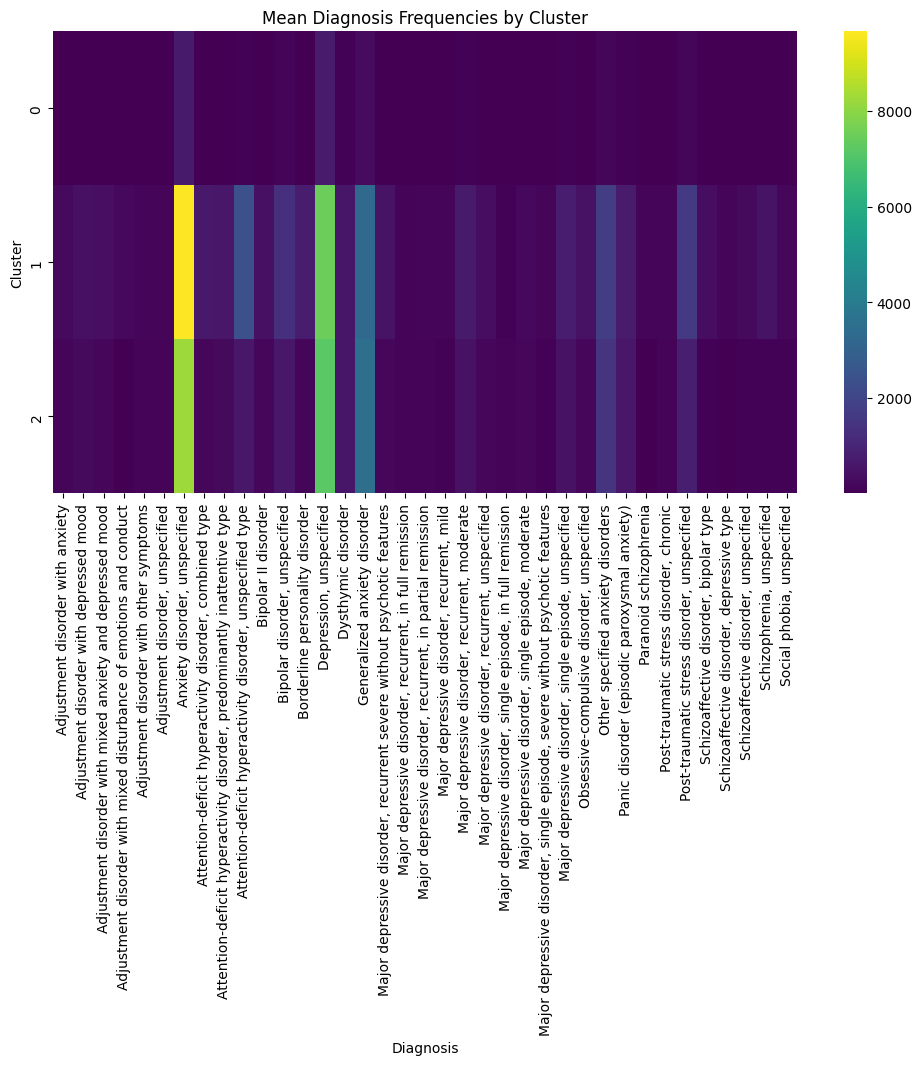

In [ ]:
# Merge cluster info back into original pivot
pivot_with_cluster = pivot.copy()
pivot_with_cluster['Cluster'] = kmeans.labels_

# Group by cluster and compute mean diagnosis distribution
cluster_means = pivot_with_cluster.groupby('Cluster').mean()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap='viridis')
plt.title('Mean Diagnosis Frequencies by Cluster')
plt.xlabel('Diagnosis')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


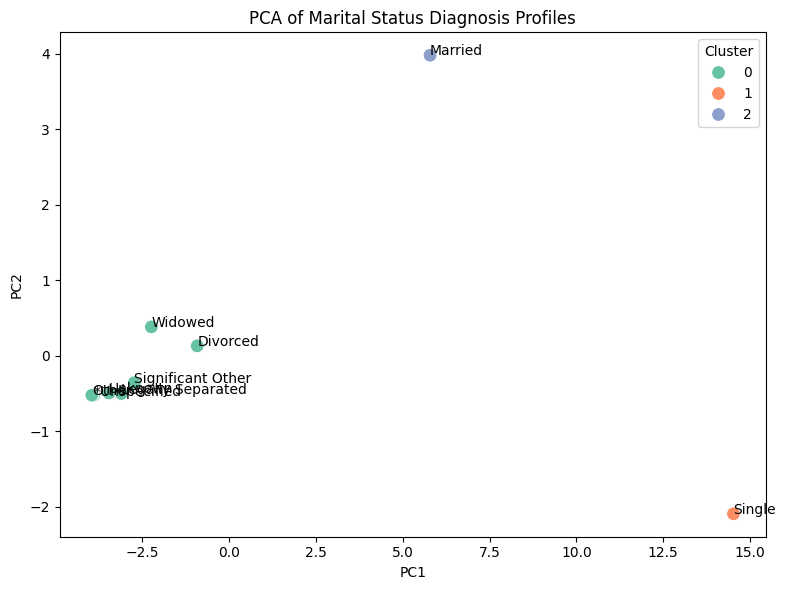

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_scaled)

# Plot PCA results, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],
                hue=kmeans.labels_, palette='Set2', s=100)

for i, txt in enumerate(pivot.index):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]))

plt.title('PCA of Marital Status Diagnosis Profiles')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


____________________________________________


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Binary label for depression
uhs['DepressionDx'] = uhs['DxDisplayString'].str.contains("Depression", case=False)

# One-hot encode marital status
X = pd.get_dummies(uhs['MaritalStatus'], drop_first=True)
y = uhs['DepressionDx']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

       False       0.78      1.00      0.88     17208
        True       0.00      0.00      0.00      4894

    accuracy                           0.78     22102
   macro avg       0.39      0.50      0.44     22102
weighted avg       0.61      0.78      0.68     22102



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
uhs.groupby('MaritalStatus')['DxDisplayString'].nunique().sort_values()


,DxDisplayString
MaritalStatus,
Other,24
*Unspecified,33
Unknown,79
Significant Other,91
Legally Separated,98
Widowed,98
Divorced,112
Married,133
Single,142


## Text Analysis for Marital Status and Ethnicity

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

# Basic cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    return text

uhs['DxClean'] = uhs['DxDisplayString'].astype(str).apply(clean_text)
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.9, min_df=5)
dtm = vectorizer.fit_transform(uhs['DxClean'])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", " | ".join(
            [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        ))

display_topics(lda_model, vectorizer.get_feature_names_out())


Topic 1:  disorder | generalized | anxiety | depressive | major | recurrent | episode | single | moderate | dysthymic
Topic 2:  anxiety | disorders | specified | disorder | adjustment | depressed | mood | personality | borderline | mixed
Topic 3:  disorder | unspecified | anxiety | bipolar | panic | paroxysmal | episodic | schizoaffective | ii | phobia
Topic 4:  unspecified | depression | psychotic | severe | features | without | predominantly | inattentive | obsessivecompulsive | reaction
Topic 5:  disorder | unspecified | type | attentiondeficit | hyperactivity | stress | posttraumatic | bipolar | current | episode


In [ ]:
topic_results = lda_model.transform(dtm)
uhs['Topic'] = topic_results.argmax(axis=1)


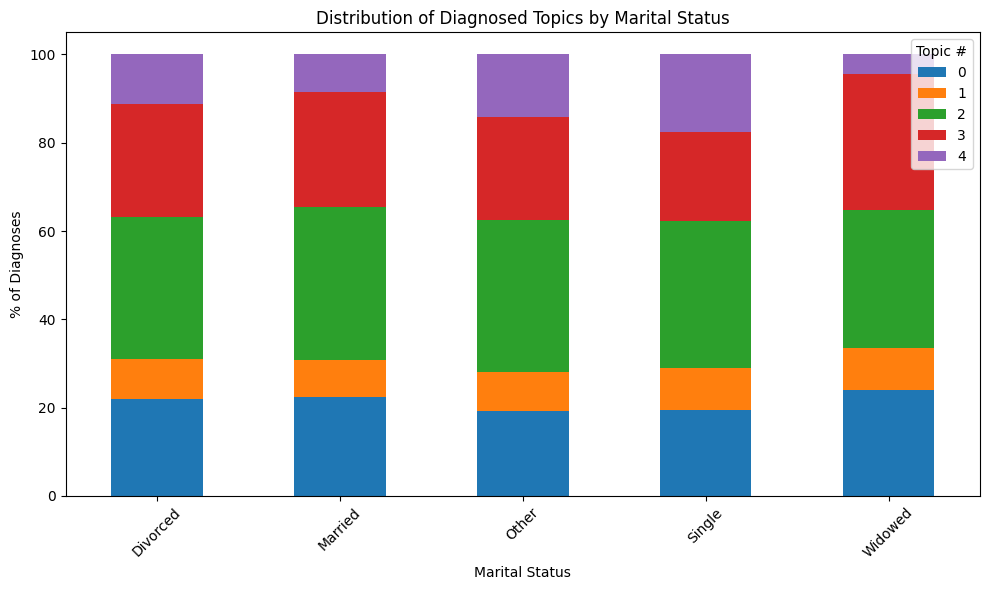

In [ ]:
topic_dist = pd.crosstab(uhs['MaritalStatus_filtered'], uhs['Topic'], normalize='index') * 100
import matplotlib.pyplot as plt

topic_dist.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribution of Diagnosed Topics by Marital Status')
plt.ylabel('% of Diagnoses')
plt.xlabel('Marital Status')
plt.legend(title='Topic #')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


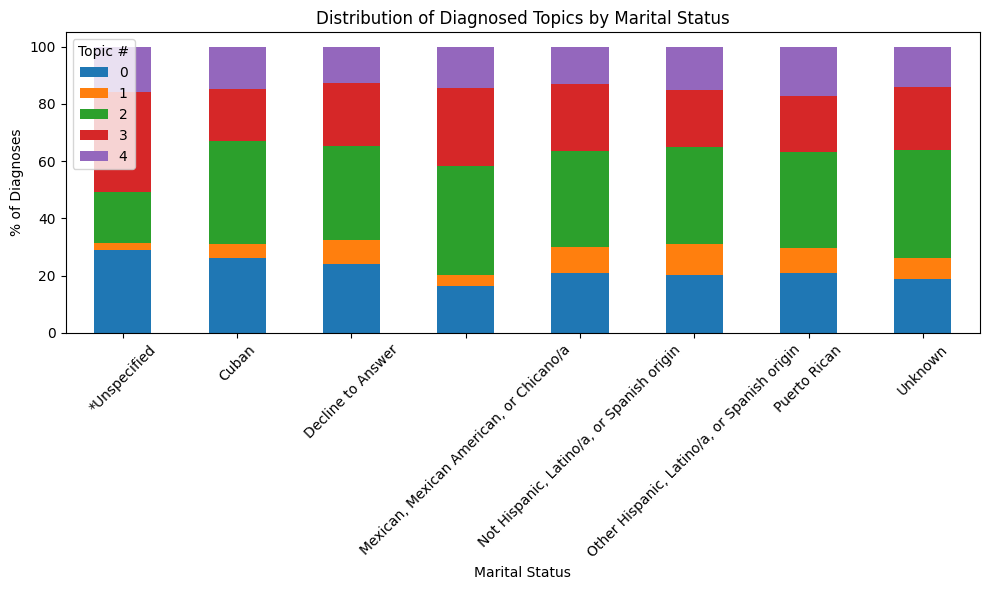

In [ ]:
topic_dist = pd.crosstab(uhs['Ethnicity'], uhs['Topic'], normalize='index') * 100
import matplotlib.pyplot as plt

topic_dist.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribution of Diagnosed Topics by Marital Status')
plt.ylabel('% of Diagnoses')
plt.xlabel('Marital Status')
plt.legend(title='Topic #')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Looking at New Additional Data


In [ ]:
file_path = '/content/drive/My Drive/Summer Capstone/Additional Data_UHS/SOM June 2025 - Summer Project File - deidentified_Additional Data.csv'
uhs2 = pd.read_csv(file_path)


In [ ]:
uhs2.describe()

,MaskedID,PatientZipCode,Mental Disorders Due To Physiological Conditions,Mental Behavioral Disorders Due To Psychoactive Substance Use,"Schizophrenia, Schizotypal, Delusional, and Other Non-Mood Disorders",Mood Disorders,"Anxiety, Dissociative, Stress-related, and Somatoform Disorders",Behavioral Syndromes Associated with Physiological Disturbances and Physical Factors,Disorders of Adult Personality and Behavior,Intellectual Disabilities,...,Behavioral Health Visits 2021,Behavioral Health Visits 2022,Behavioral Health Visits 2023,Behavioral Health Visits 2024,Chemical Dependency Visits 2020,Chemical Dependency Visits 2021,Chemical Dependency Visits 2022,Chemical Dependency Visits 2023,Chemical Dependency Visits 2024,ActivePsychMedRx
count,1.530590e+05,152994.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,...,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000,153059.000000
mean,3.224130e+05,14063.102795,0.005638,0.078604,0.006442,0.115661,0.162682,0.015974,0.006272,0.003018,...,0.866333,0.940324,0.991376,1.401270,0.123900,0.437217,0.447520,0.399023,0.450303,0.343123
std,5.205039e+05,2675.596279,0.074877,0.269120,0.080003,0.319819,0.369077,0.125376,0.078948,0.054858,...,11.564249,11.774996,10.079244,12.325693,2.675777,7.849910,8.389067,7.784407,8.201737,0.474754
min,1.469114e+00,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.052029e+04,13760.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.706851e+05,13827.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.657577e+05,13901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.431515e+06,98588.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,476.000000,680.000000,351.000000,435.000000,168.000000,435.000000,506.000000,696.000000,714.000000,1.000000


In [ ]:
uhs2.columns

Index(['MaskedID', 'PrimaryDepartment', 'FirstRace', 'SexAssignedAtBirth',
       'SexualOrientation', 'GenderIdentity', 'PreferredLanguage', 'Ethnicity',
       'Sex', 'PatientCity', 'PatientZipCode', 'MaritalStatus',
       'Mental Disorders Due To Physiological Conditions',
       'Mental Behavioral Disorders Due To Psychoactive Substance Use',
       'Schizophrenia, Schizotypal, Delusional, and Other Non-Mood Disorders',
       'Mood Disorders',
       'Anxiety, Dissociative, Stress-related, and Somatoform Disorders',
       'Behavioral Syndromes Associated with Physiological Disturbances and Physical Factors',
       'Disorders of Adult Personality and Behavior',
       'Intellectual Disabilities',
       'Behavioral and Emotional Disorders with Onset in Childhood or Adolescence',
       'Unspecified Mental Disorder', 'Access to Care', 'Alcohol Use',
       'Caregiver Education and Work', 'Caregiver Health', 'Child Education',
       'Depression', 'Educational Attainment', 'Employ

In [ ]:
import pandas as pd

df = uhs2    # or however you’re loading it
df.head()                            # look at first 5 rows
df[['MaritalStatus', 'Substance Use']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153059 entries, 0 to 153058
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   MaritalStatus  153059 non-null  object
 1   Substance Use  153059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
# Unique categories in MaritalStatus
print("MaritalStatus unique values:")
print(df['MaritalStatus'].unique(), "\n")

# Counts per category
print("MaritalStatus value counts:")
print(df['MaritalStatus'].value_counts(), "\n")

# Substance Use counts
print("Substance Use value counts:")
print(df['Substance Use'].value_counts())


MaritalStatus unique values:
['Single' 'Married' 'Divorced' 'Significant Other' 'Widowed' 'Unknown'
 'Legally Separated' 'Other' '*Unspecified'] 

MaritalStatus value counts:
MaritalStatus
Married              61551
Single               60596
Divorced             11669
Widowed               9364
Significant Other     4941
Legally Separated     2884
Unknown               1899
Other                  119
*Unspecified            36
Name: count, dtype: int64 

Substance Use value counts:
Substance Use
0    152803
1       256
Name: count, dtype: int64


In [ ]:
# 3a. Map substance-use
df['SubstanceUseLabel'] = df['Substance Use'].map({0:'No', 1:'Yes'})

# 3b. Consolidate marital-status
marital_map = {
    'Other':          'Other/Unknown',
    '*Unspecified':   'Other/Unknown'
}
df['MaritalStatusClean'] = df['MaritalStatus'].replace(marital_map)

# 3c. Check your cleaned counts
print("Clean MaritalStatus counts:\n", df['MaritalStatusClean'].value_counts(), "\n")
print("Substance Use counts:\n", df['SubstanceUseLabel'].value_counts())


Clean MaritalStatus counts:
 MaritalStatusClean
Married              61551
Single               60596
Divorced             11669
Widowed               9364
Significant Other     4941
Legally Separated     2884
Unknown               1899
Other/Unknown          155
Name: count, dtype: int64 

Substance Use counts:
 SubstanceUseLabel
No     152803
Yes       256
Name: count, dtype: int64


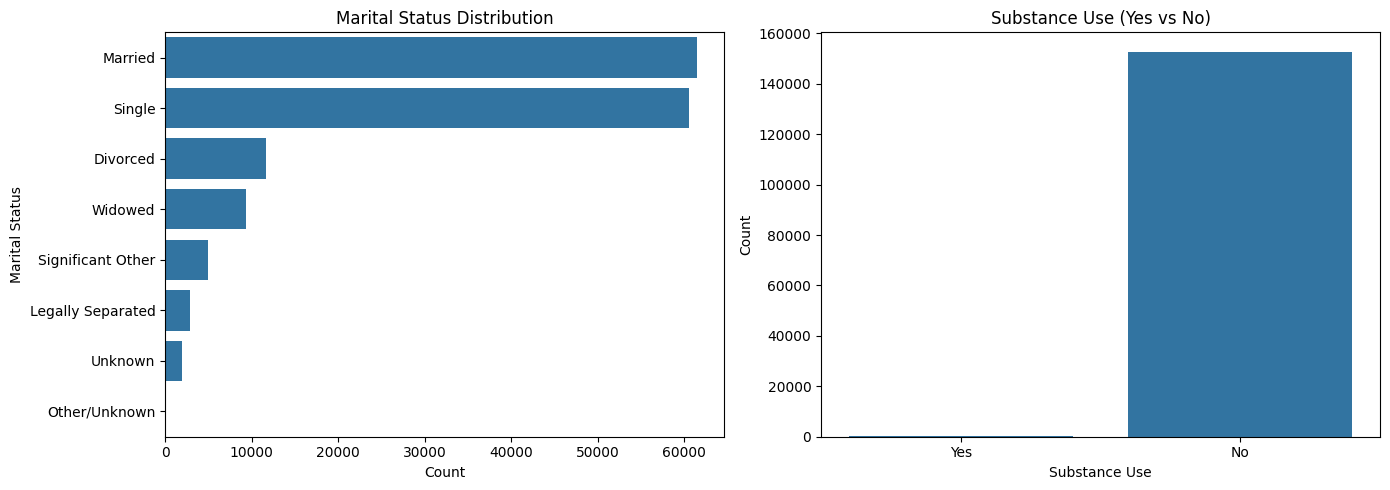

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Marital Status bar
sns.countplot(
    data=df,
    y='MaritalStatusClean',
    order=df['MaritalStatusClean'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('Marital Status Distribution')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Marital Status')

# Substance Use bar
sns.countplot(
    data=df,
    x='SubstanceUseLabel',
    order=['Yes','No'],
    ax=axes[1]
)
axes[1].set_title('Substance Use (Yes vs No)')
axes[1].set_xlabel('Substance Use')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


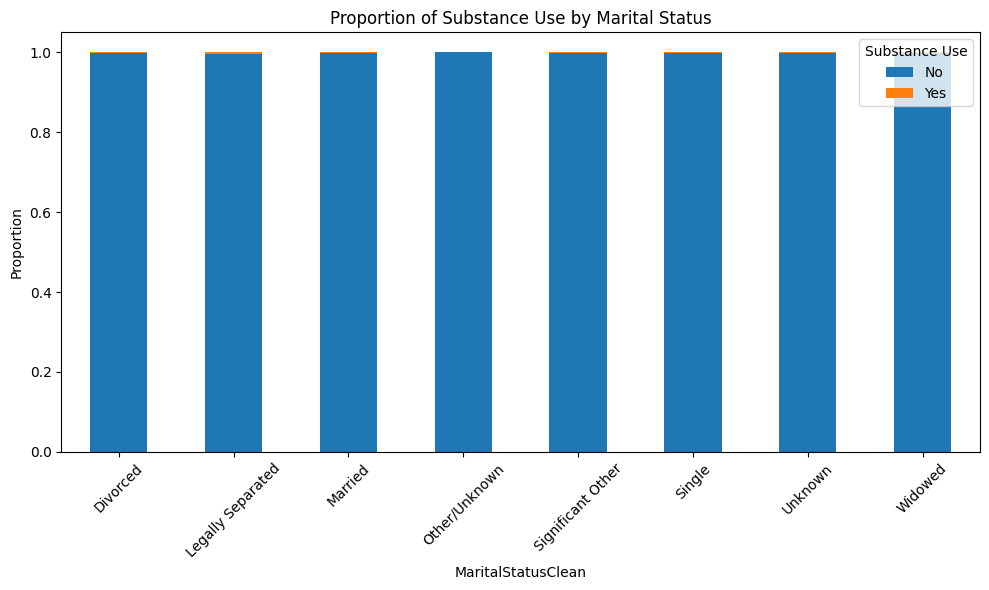

In [ ]:
import matplotlib.pyplot as plt

# 5a. Crosstab (proportions within each marital group)
ct = pd.crosstab(
    df['MaritalStatusClean'],
    df['SubstanceUseLabel'],
    normalize='index'
)

# 5b. Plot stacked bar
ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    rot=45
)
plt.title('Proportion of Substance Use by Marital Status')
plt.ylabel('Proportion')
plt.legend(title='Substance Use', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
uhs2.columns

Index(['MaskedID', 'PrimaryDepartment', 'FirstRace', 'SexAssignedAtBirth',
       'SexualOrientation', 'GenderIdentity', 'PreferredLanguage', 'Ethnicity',
       'Sex', 'PatientCity', 'PatientZipCode', 'MaritalStatus',
       'Mental Disorders Due To Physiological Conditions',
       'Mental Behavioral Disorders Due To Psychoactive Substance Use',
       'Schizophrenia, Schizotypal, Delusional, and Other Non-Mood Disorders',
       'Mood Disorders',
       'Anxiety, Dissociative, Stress-related, and Somatoform Disorders',
       'Behavioral Syndromes Associated with Physiological Disturbances and Physical Factors',
       'Disorders of Adult Personality and Behavior',
       'Intellectual Disabilities',
       'Behavioral and Emotional Disorders with Onset in Childhood or Adolescence',
       'Unspecified Mental Disorder', 'Access to Care', 'Alcohol Use',
       'Caregiver Education and Work', 'Caregiver Health', 'Child Education',
       'Depression', 'Educational Attainment', 'Employ

<ipython-input-20-949245253>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


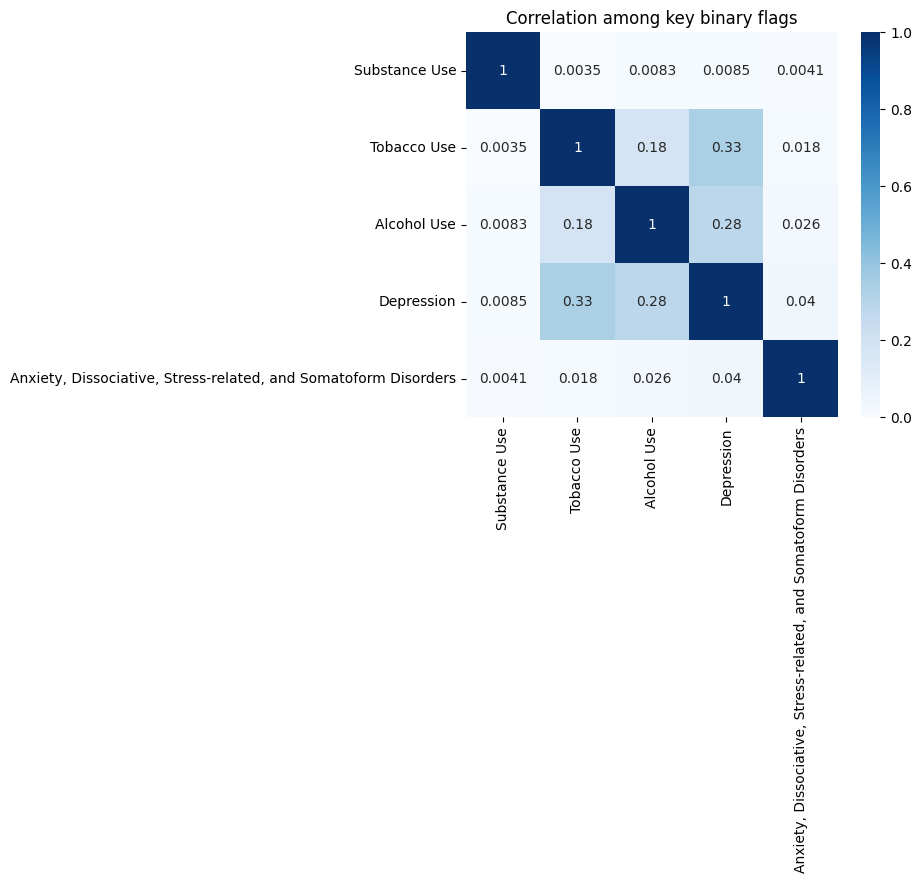

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define your flags
flags = ['Substance Use', 'Tobacco Use', 'Alcohol Use', 'Depression', 'Anxiety, Dissociative, Stress-related, and Somatoform Disorders']

# 2. Map to binary (0/1); any non-1 becomes 0
bin_df = pd.DataFrame({
    col: np.where(df[col]==1, 1, 0)
    for col in flags
})

# 3. Compute correlation matrix
corr = bin_df.corr()

# 4. Plot
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues')
plt.title('Correlation among key binary flags')
plt.tight_layout()
plt.show()
